In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [44]:
data = pd.read_csv("data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [46]:
data.isnull().sum()

x    0
y    1
dtype: int64


# DATA PROCESSING

In [47]:
data = data.dropna()
print("shape of data:",data.shape)

shape of data: (699, 2)


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# SPLITTING DATA

#### training input and output data

In [49]:
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#### validation input and output data 

In [64]:
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [29]:
print("training input shape", train_input.shape)
print("training output shape", train_output.shape)
print("validation input shape", test_input.shape)
print("validation output shape", test_output.shape)

training input shape (500, 1)
training output shape (500, 1)
validation input shape (199, 1)
validation output shape (199, 1)


# <font color="green"> LINEAR REGRESSION </font>

## Forward Propogation

In [65]:
def forward_propogation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m,train_input) + c
    
    return predictions

## Cost Function

In [86]:
def cost_fuction(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) *0.5
    
    return cost

# Gradient Descent For Back Propogation

In [67]:
def back_propogation(train_input, train_output, predictions):
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    
    return derivatives

## Update Parameters 

m = m - (learning_rate * dm)
c = c - (learning_rate * dc)

In [68]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate*derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate*derivatives["dc"]
    
    return parameters

## Model Training 

In [71]:
def train(train_input, train_output, learning_rate, iters):
    
    # random prameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)
    
    plt.figure()
    
    # loss 
    loss = list()
    
    # iterations
    for i in range(iters):
        
        # forward propogation
        predictions = forward_propogation(train_input, parameters)
        
        # cost function
        cost = cost_fuction(predictions, train_output)
        
        loss.append(cost) 
        print(f"Iterations:{i+1}, loss:{cost}")
        
        #plot 
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label ="Original")
        ax.plot(train_input, predictions, '*', label ="Training")
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+', label ="Original")
        plt.plot(train_input, predictions, '*', label ="Training")
        plt.show()
        
        
        
        # back propogation
        derivatives = back_propogation(train_input, train_output, predictions)
            
        # update parameters 
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

# Training


Iterations:1, loss:33.36530413514069


<Figure size 640x480 with 0 Axes>

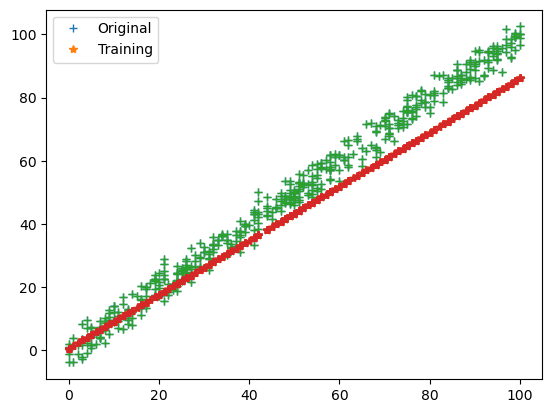

Iterations:2, loss:17.318975226534864


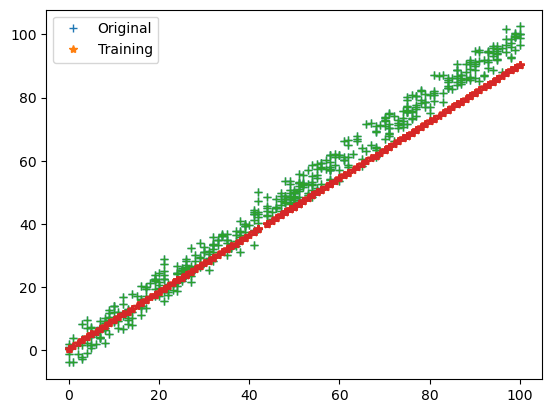

Iterations:3, loss:10.038735766658888


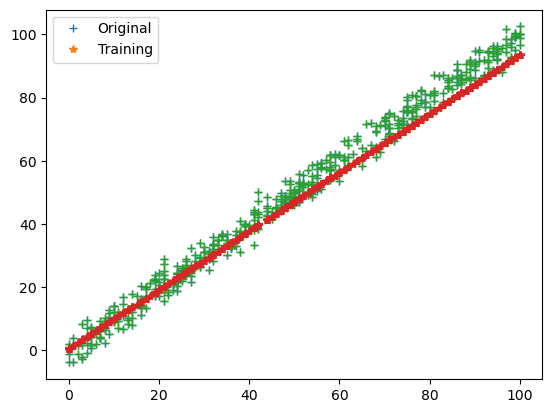

Iterations:4, loss:6.735680799467472


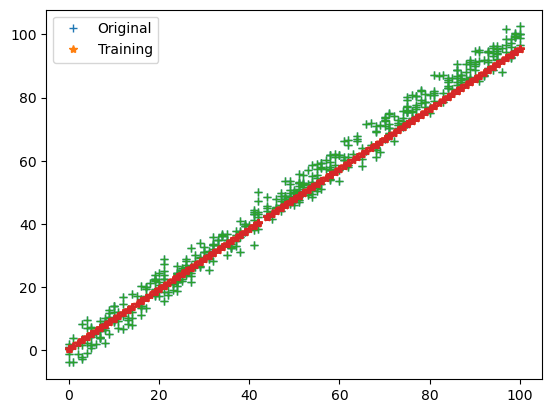

Iterations:5, loss:5.2370788420143715


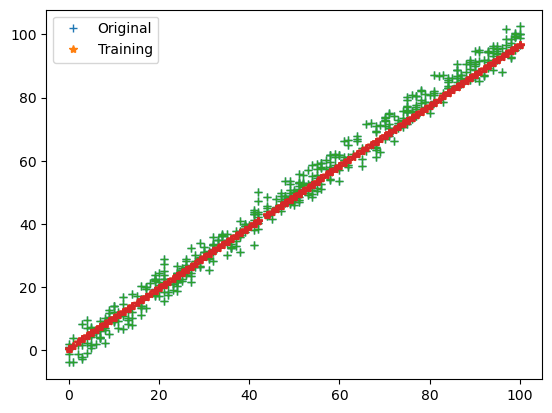

Iterations:6, loss:4.55715921387992


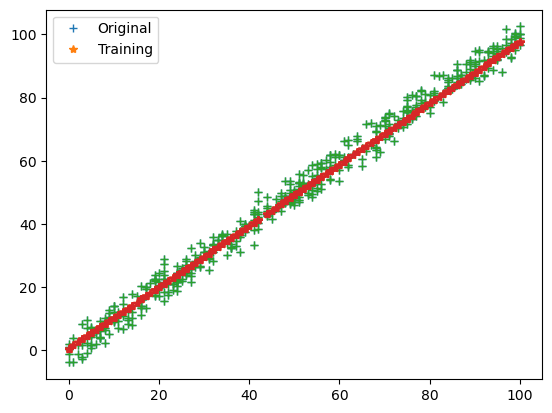

Iterations:7, loss:4.248676665477468


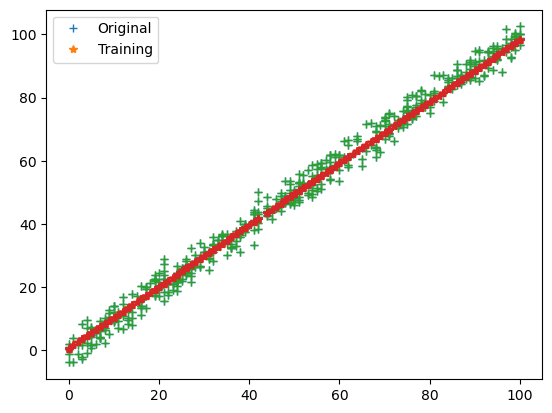

Iterations:8, loss:4.108715531682299


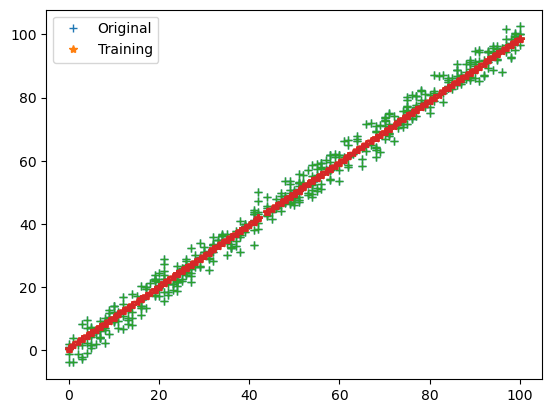

Iterations:9, loss:4.045212750469554


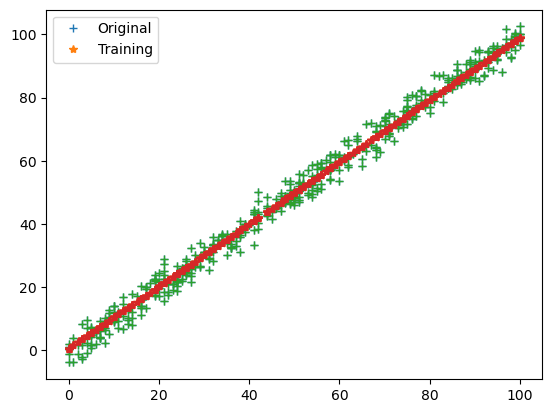

Iterations:10, loss:4.016399208625711


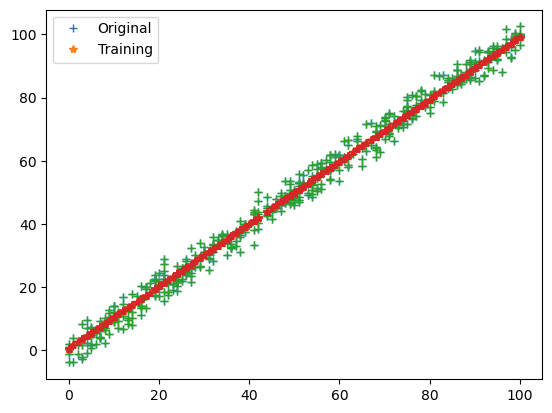

Iterations:11, loss:4.003324213220596


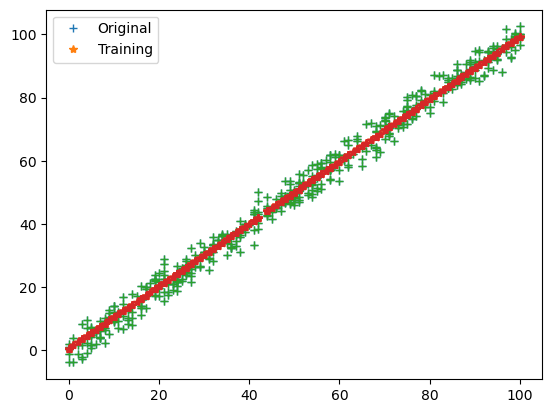

Iterations:12, loss:3.9973898138812145


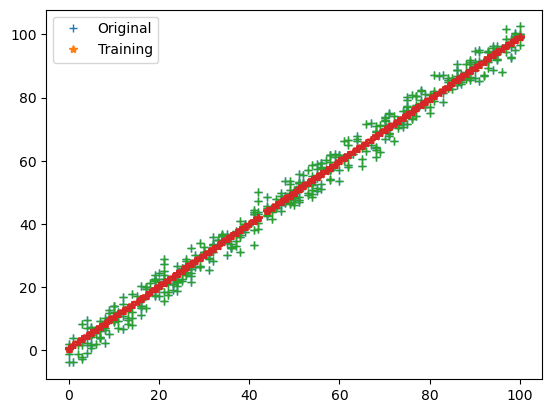

Iterations:13, loss:3.9946951109998916


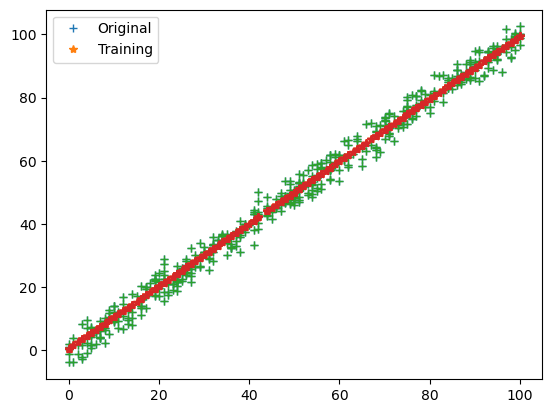

Iterations:14, loss:3.993470262103821


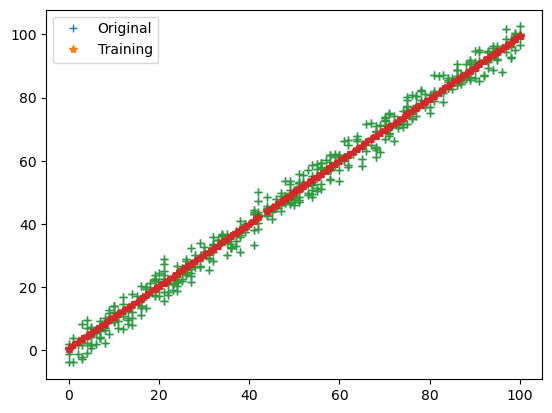

Iterations:15, loss:3.992912287702735


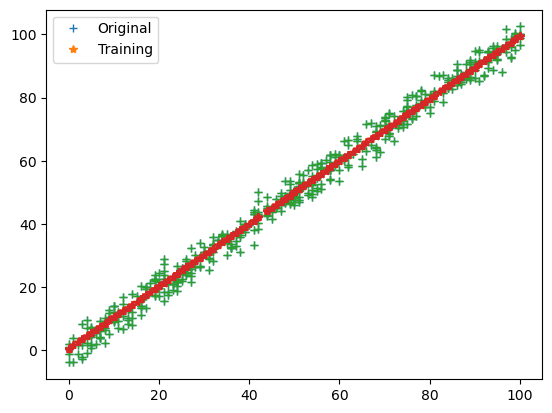

Iterations:16, loss:3.9926568751124782


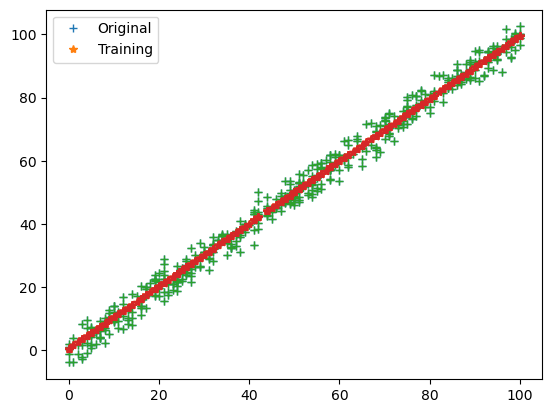

Iterations:17, loss:3.9925387352647173


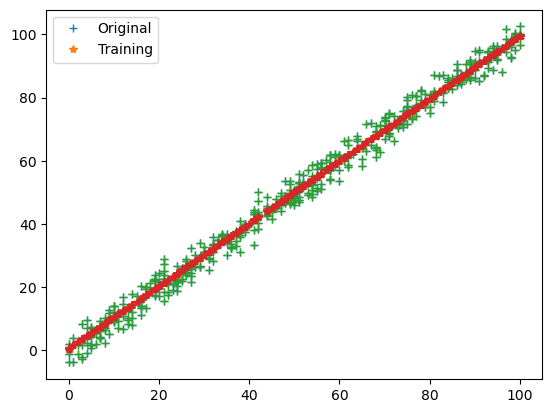

Iterations:18, loss:3.992482876326065


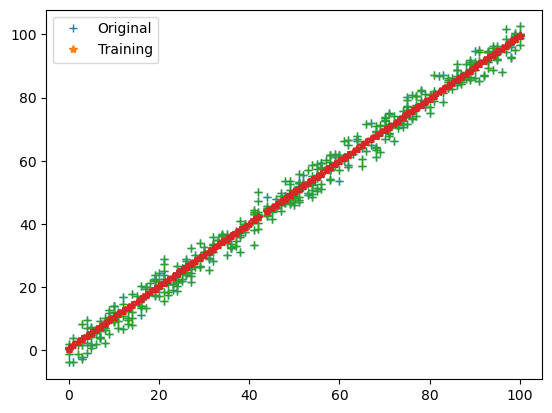

Iterations:19, loss:3.992455274418637


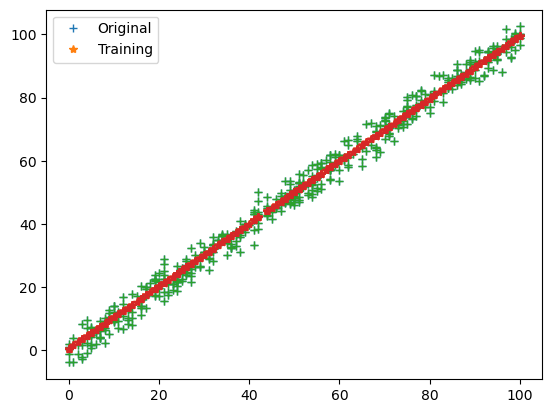

Iterations:20, loss:3.9924404928713533


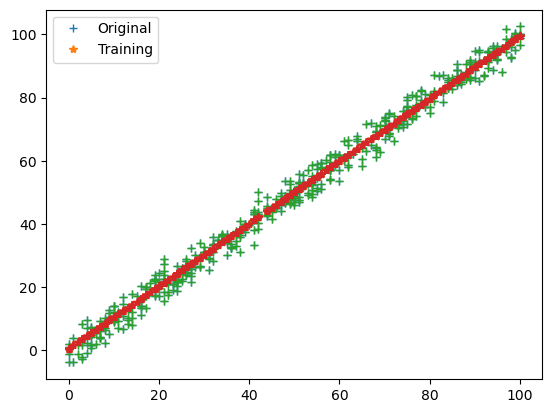

In [75]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [77]:
print(parameters)

{'m': 0.9887282273299027, 'c': 0.5711291272717086}


In [79]:
loss

[33.36530413514069,
 17.318975226534864,
 10.038735766658888,
 6.735680799467472,
 5.2370788420143715,
 4.55715921387992,
 4.248676665477468,
 4.108715531682299,
 4.045212750469554,
 4.016399208625711,
 4.003324213220596,
 3.9973898138812145,
 3.9946951109998916,
 3.993470262103821,
 3.992912287702735,
 3.9926568751124782,
 3.9925387352647173,
 3.992482876326065,
 3.992455274418637,
 3.9924404928713533]

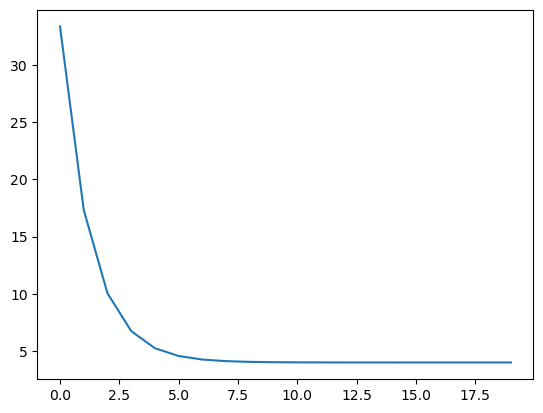

In [81]:
plt.plot(loss)

# Let's Predict


In [82]:
test_predictions = test_input*parameters["m"] + parameters["c"]


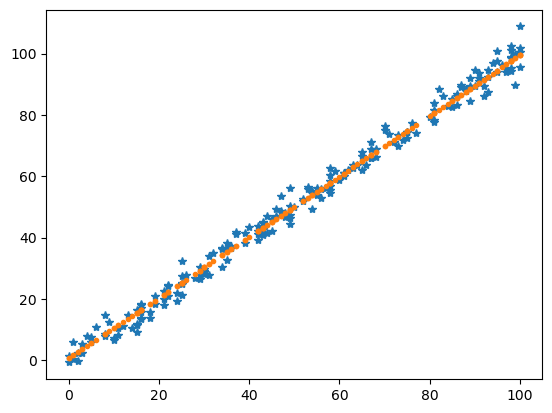

In [84]:
plt.plot(test_input, test_output, "*")
plt.plot(test_input, test_predictions,".")
plt.show()

# Cost of Prediction

In [87]:
cost_fuction(test_output, test_predictions)

4.00770493409096